## CLIMATE CHANGE ANALYSIS USEING MACHINE LEARNING

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimpy import skim
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Reading the dataset

In [3]:
## reading the dataset
data=pd.read_csv(r"climate_change_extended_to_2024.csv")

In [4]:
## head -- first five rows
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [5]:
## tail -- last five rows
data.tail()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
495,2024,8,-0.254624,410.335488,1910.882036,332.338925,287.543333,690.233865,1366.098187,-0.023391,0.766147
496,2024,9,-0.260095,410.075290,1911.430667,332.396640,287.525563,690.592318,1366.094454,-0.023345,0.762064
497,2024,10,-0.265565,409.815093,1911.979298,332.454356,287.507792,690.950771,1366.090722,-0.023298,0.757982
498,2024,11,-0.271036,409.554895,1912.527929,332.512071,287.490021,691.309224,1366.086989,-0.023252,0.753900
499,2024,12,-0.276507,409.294697,1913.076559,332.569786,287.472251,691.667677,1366.083256,-0.023205,0.749817


In [6]:
### finding the shape of dataset -- rows and columns
data.shape

(500, 11)

In [7]:
### information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      500 non-null    int64  
 1   Month     500 non-null    int64  
 2   MEI       500 non-null    float64
 3   CO2       500 non-null    float64
 4   CH4       500 non-null    float64
 5   N2O       500 non-null    float64
 6   CFC-11    500 non-null    float64
 7   CFC-12    500 non-null    float64
 8   TSI       500 non-null    float64
 9   Aerosols  500 non-null    float64
 10  Temp      500 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 43.1 KB


In [8]:
### statical information about the dataset
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2003.664000,6.532000,0.128195,376.640356,1795.066808,317.999514,262.024610,551.786035,1366.080104,0.005329,0.402357
std,12.041308,3.449169,0.760941,20.270252,69.697517,8.448403,20.667157,84.655579,0.313783,0.027237,0.237863
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,-0.023716,-0.282000
25%,1993.000000,4.000000,-0.212798,358.192500,1750.772500,310.216750,253.614750,513.686750,1365.845225,-0.009339,0.199750
50%,2004.000000,7.000000,-0.062120,376.850000,1791.875000,318.129500,268.484000,541.750500,1366.090205,0.002450,0.441000
75%,2014.000000,10.000000,0.424250,394.127480,1853.915765,325.286057,275.021943,622.143614,1366.120810,0.007100,0.598968
max,2024.000000,12.000000,3.001000,412.156871,1913.076559,332.569786,287.667728,691.667677,1367.316200,0.149400,0.794723


In [9]:
### printing the columns in dataset
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

### finding the summary of the dataset

In [10]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 500    │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 11     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean     ┃ sd      ┃ p0       ┃ p25       ┃ p50      ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Year         │  0 │    0 │     2004 │   12.04 │     1983 │      1993 │     2004 │   2014 │   2024 │ ▇▇▇▇▇▇ │  │
│ │ Month        │  0 │    0 │    6.532 │   3.449 │        1 │         4 │        7 │     10 │     12 │ ▇▇▇▇▇▇ │  │
│ │ MEI          │  0 │    0 │   0.1282 │  0.7609 │   -1.635 │   -0.2128 │ -0.06212 │ 0.4243 │  3.001 │ ▁▇▇▃▁▁ │  │
│ │ CO2          │  0 │    0 │    376.6 │   20.27 │    340.2 │     358.2 │    376.9 │  394.1 │  412.2 │ ▆▇▇▇▇▇ │  │
│ │ CH4          │  0 │    0 │     1795 │    69.7 │     1630 │      1751 │     1792 │   1854 │   1913 │ ▂▃▆▇▆▆ │  │
│ │ N2O          │  0 │    0 │      318 │   8.448 │    303.7 │     310.2 │    318.1 │  325.3 │  332.6 │ ▇▇▆▇▇▇ │  │
│ │ CFC-11       │  0 │    0 │      262 │   20.67 │    191.3 │     253.6 │    268.5 │    275 │  287.7 │ ▁▁▁▃▇▆ │  │
│ │ CFC-12       │  0 │    0 │    551.8 │   84.66 │    350.1 │     513.7 │    541.8 │  622.1 │  691.7 │ ▂▂▃▇▅▅ │  │
│ │ TSI          │  0 │    0 │     1366 │  0.3138 │     1365 │      1366 │     1366 │   1366 │   1367 │ ▃▂▇▁▁  │  │
│ │ Aerosols     │  0 │    0 │ 0.005329 │ 0.02724 │ -0.02372 │ -0.009339 │  0.00245 │ 0.0071 │ 0.1494 │   ▇▃   │  │
│ │ Temp         │  0 │    0 │   0.4024 │  0.2379 │   -0.282 │    0.1998 │    0.441 │  0.599 │ 0.7947 │  ▃▆▅▇▆ │  │
│ └──────────────┴────┴──────┴──────────┴─────────┴──────────┴───────────┴──────────┴────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Finding the Null values in dataset

In [11]:
## finding the null in dataset
data.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

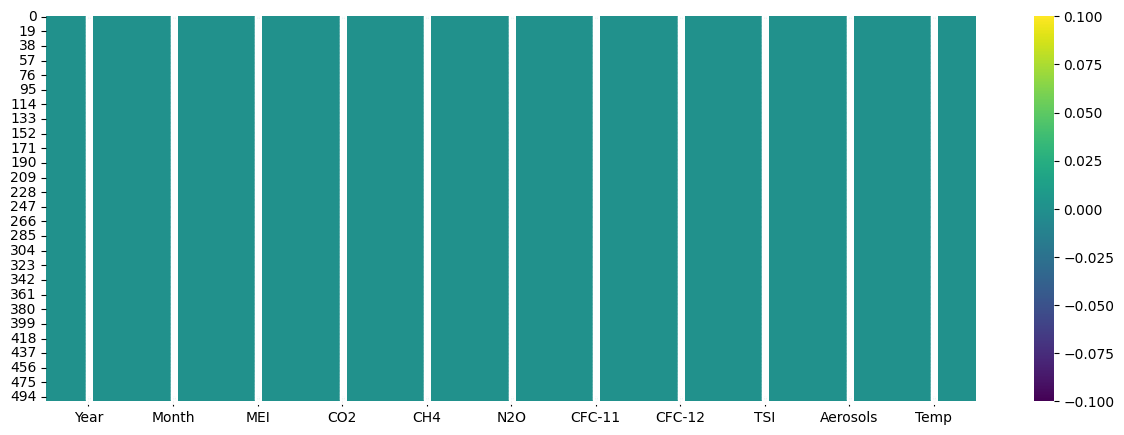

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(),annot=True,cmap="viridis")
plt.show()

In [13]:
## finding the datatypes
data.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

In [14]:
df = data

In [15]:
# Drop non-numerical columns
numerical_cols = ['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols', 'Temp']
data = data[numerical_cols]

# Set up plot style
sns.set(style="whitegrid")



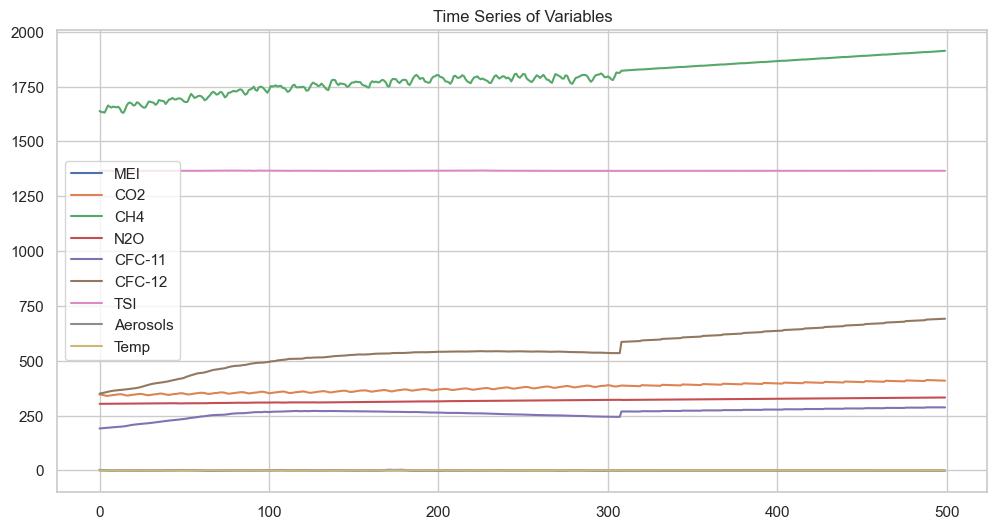

In [16]:
# Line plot of all variables
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    plt.plot(data.index, data[col], label=col)
plt.title('Time Series of Variables')
plt.legend()
plt.show()

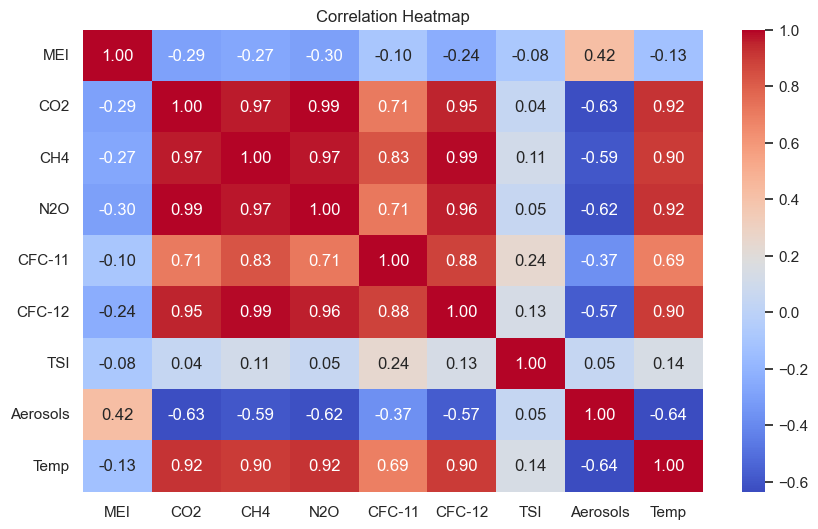

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

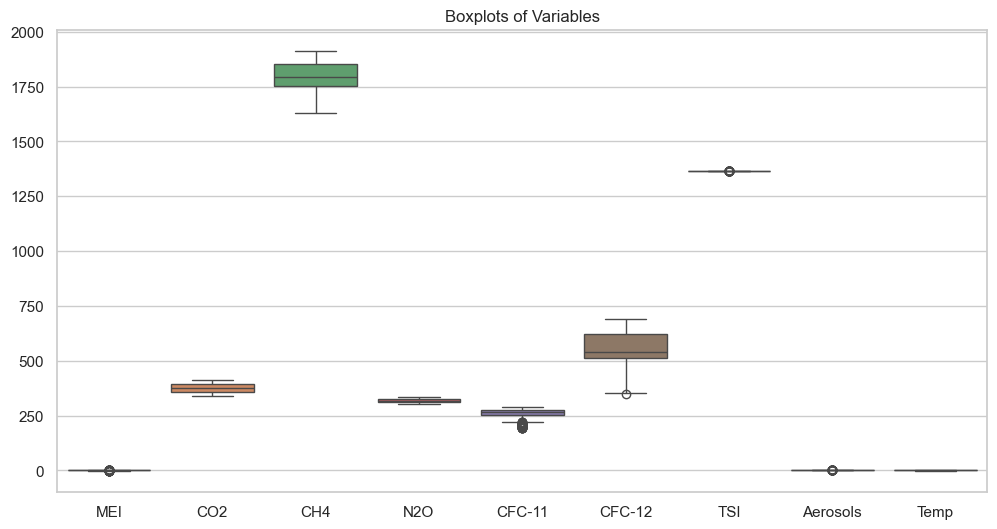

In [18]:
# Boxplots for variable distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Boxplots of Variables')
plt.show()


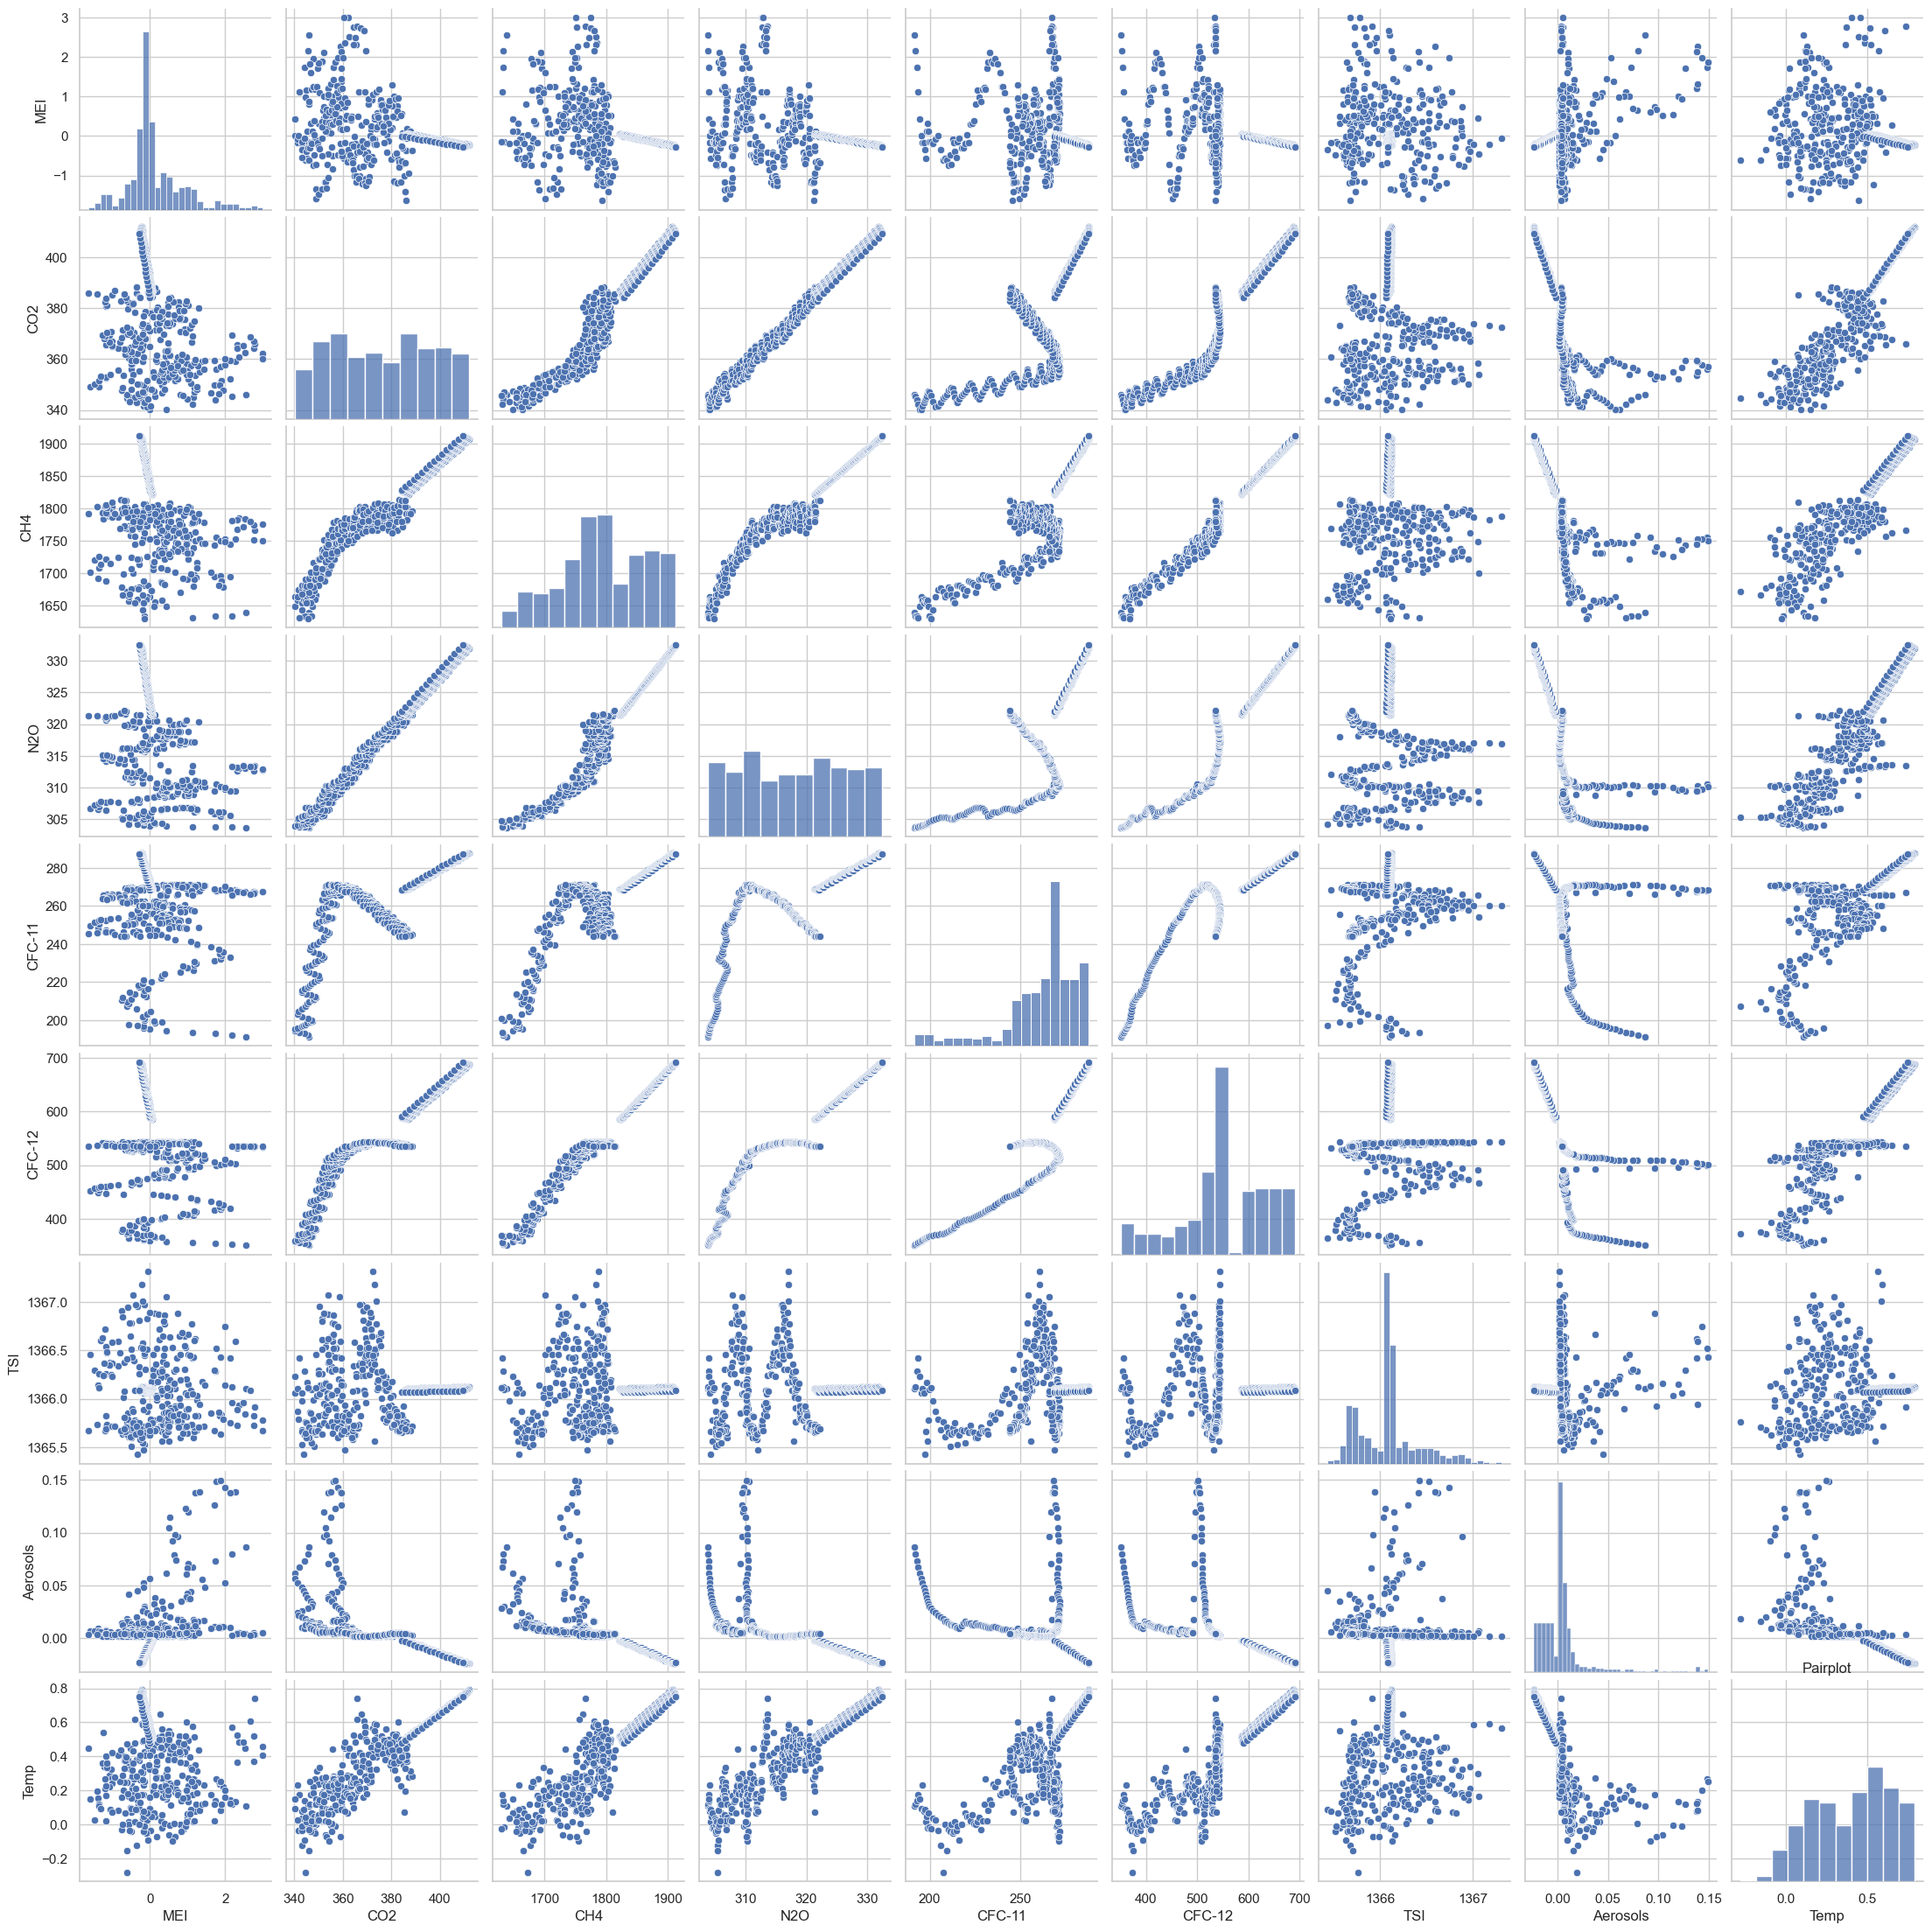

In [19]:
# Pairplot for scatter matrices
sns.pairplot(data)
plt.title('Pairplot')
plt.show()


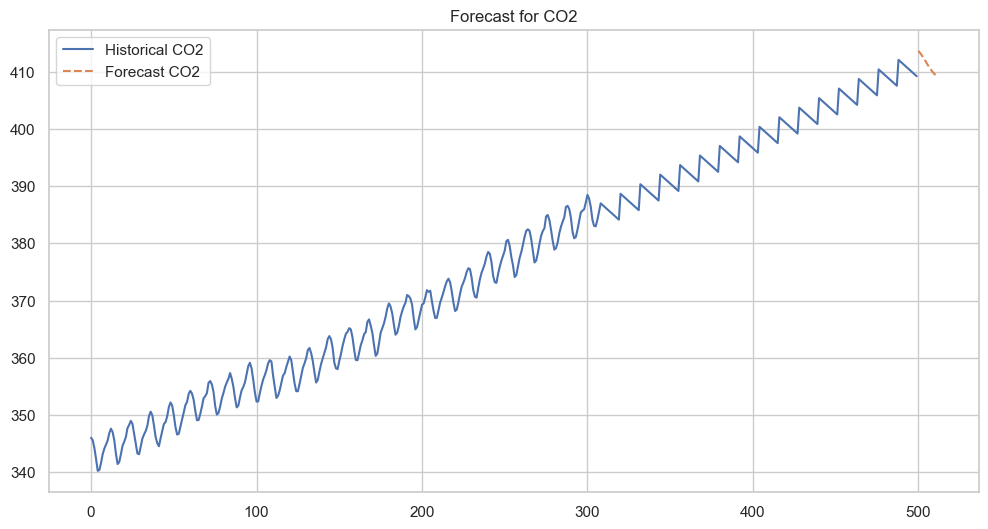

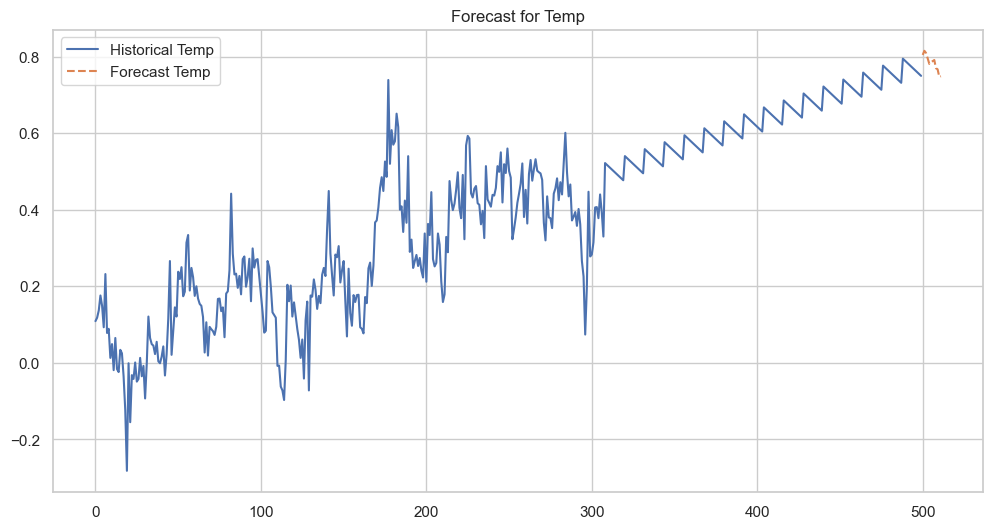

In [20]:
# Forecast for one variable using Exponential Smoothing
for col in ['CO2', 'Temp']:
    model = ExponentialSmoothing(data[col], seasonal='add', seasonal_periods=12).fit()
    forecast = model.forecast(steps=12)
    plt.figure(figsize=(12, 6))
    plt.plot(data[col], label=f'Historical {col}')
    plt.plot(forecast, label=f'Forecast {col}', linestyle='--')
    plt.title(f'Forecast for {col}')
    plt.legend()
    plt.show()

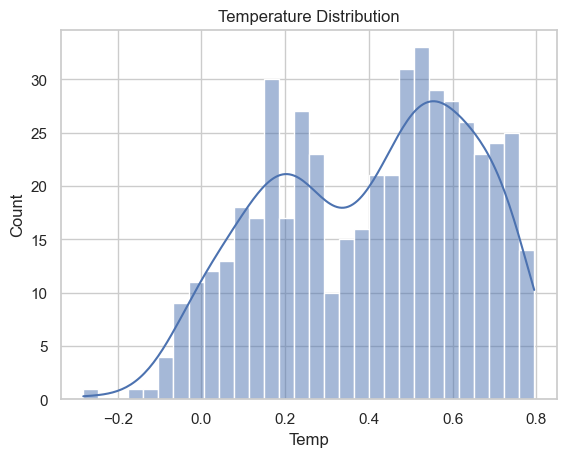

In [21]:
#  Distribution plot for temperature
sns.histplot(data['Temp'], kde=True, bins=30)
plt.title('Temperature Distribution')
plt.show()

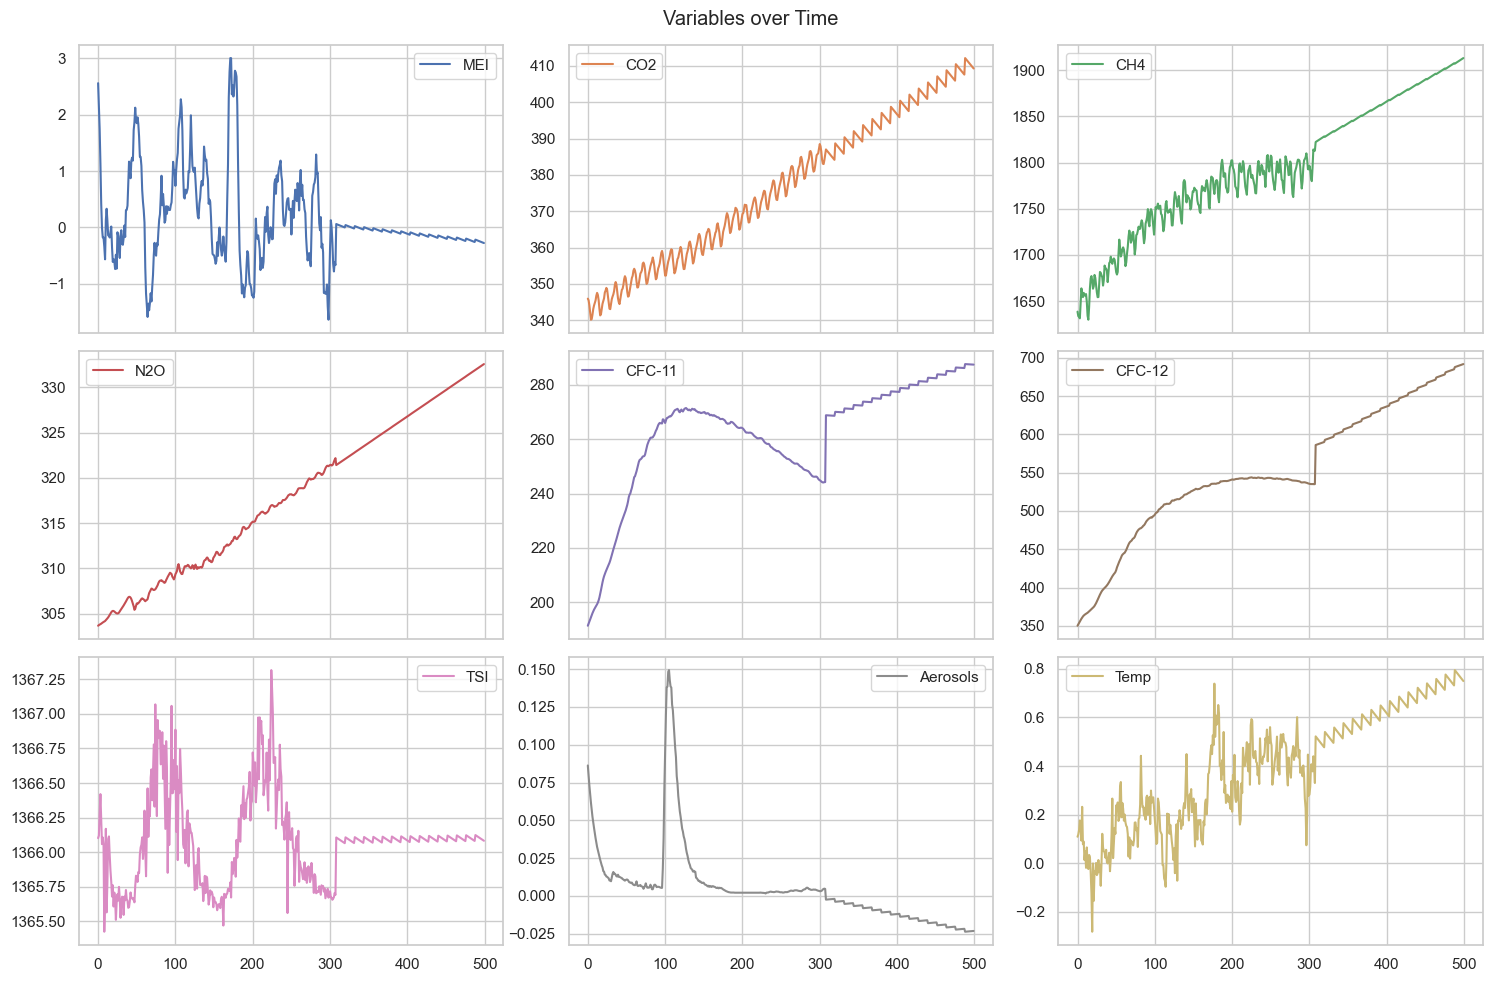

In [22]:
# Line plot with subplots for each variable
data.plot(subplots=True, layout=(3, 3), figsize=(15, 10), title='Variables over Time')
plt.tight_layout()
plt.show()

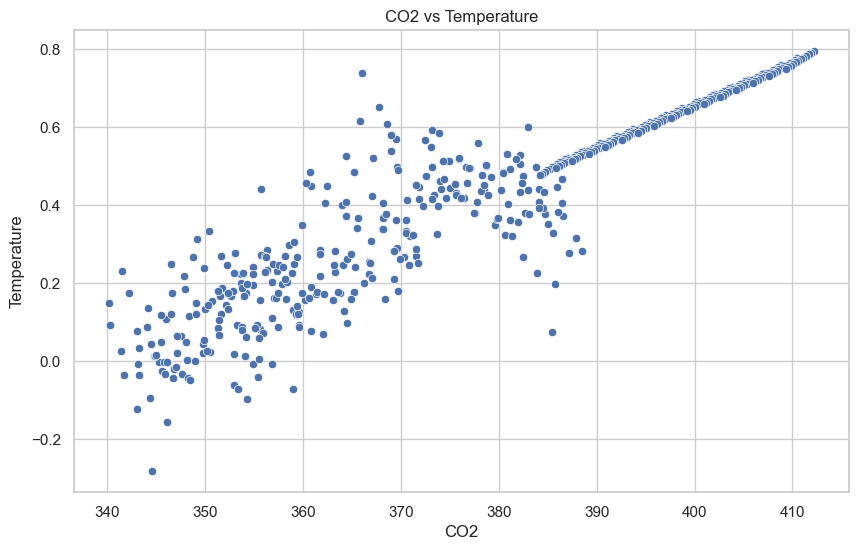

In [23]:
#  Scatter plot: CO2 vs Temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['CO2'], y=data['Temp'])
plt.title('CO2 vs Temperature')
plt.xlabel('CO2')
plt.ylabel('Temperature')
plt.show()


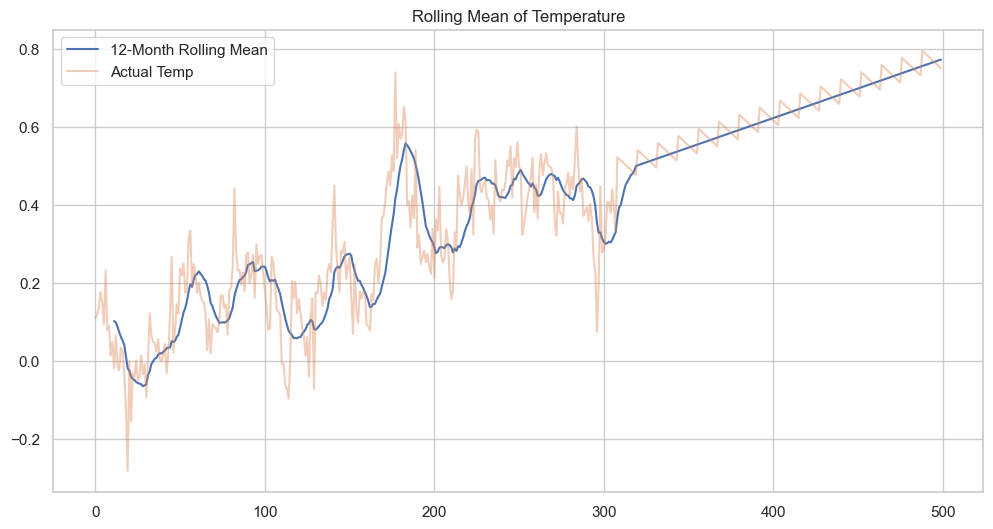

In [24]:
# Rolling mean plot for Temp
plt.figure(figsize=(12, 6))
data['Temp'].rolling(window=12).mean().plot(label='12-Month Rolling Mean')
plt.plot(data['Temp'], alpha=0.4, label='Actual Temp')
plt.title('Rolling Mean of Temperature')
plt.legend()
plt.show()

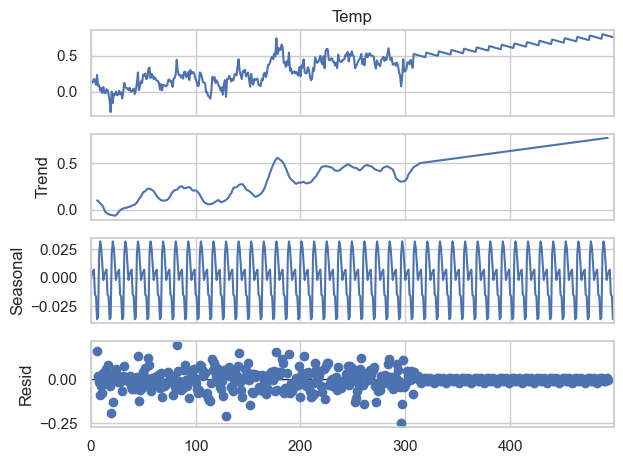

In [25]:
# Seasonal decomposition for Temp
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Temp'], model='additive', period=12)
result.plot()
plt.show()

In [26]:
# # Interactive scatter plot (Plotly)
# fig = px.scatter(data, x='CO2', y='Temp', color='CH4', size='N2O', title='Interactive CO2 vs Temp')
# fig.show()


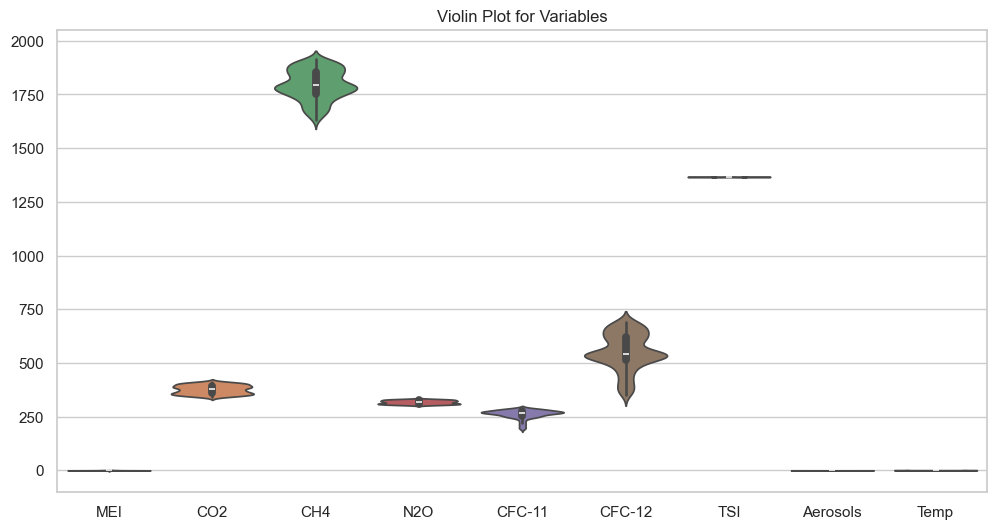

In [27]:
#  Violin plot for all variables
plt.figure(figsize=(12, 6))
sns.violinplot(data=data)
plt.title('Violin Plot for Variables')
plt.show()

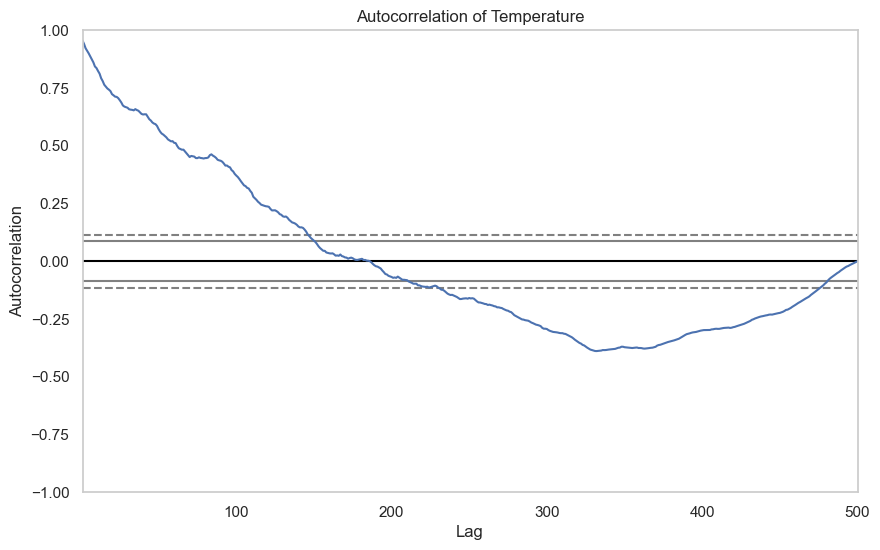

In [28]:
#  Autocorrelation for Temp
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(data['Temp'])
plt.title('Autocorrelation of Temperature')
plt.show()

### Dataspltting

In [29]:
data.columns

Index(['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols',
       'Temp'],
      dtype='object')

In [30]:
# X=df.drop(['Month'],axis=1)
# X=X.drop(['Year'],axis=1)
X=df.drop(['Temp','CFC-12'],axis=1)
y=df['Temp']

In [31]:
X

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,TSI,Aerosols
0,1983,5,2.556000,345.960000,1638.590000,303.677000,191.324000,1366.102400,0.086300
1,1983,6,2.167000,345.520000,1633.710000,303.746000,192.057000,1366.120800,0.079400
2,1983,7,1.741000,344.150000,1633.220000,303.795000,192.818000,1366.285000,0.073100
3,1983,8,1.130000,342.250000,1631.350000,303.839000,193.602000,1366.420200,0.067300
4,1983,9,0.428000,340.170000,1648.400000,303.901000,194.392000,1366.233500,0.061900
...,...,...,...,...,...,...,...,...,...
495,2024,8,-0.254624,410.335488,1910.882036,332.338925,287.543333,1366.098187,-0.023391
496,2024,9,-0.260095,410.075290,1911.430667,332.396640,287.525563,1366.094454,-0.023345
497,2024,10,-0.265565,409.815093,1911.979298,332.454356,287.507792,1366.090722,-0.023298
498,2024,11,-0.271036,409.554895,1912.527929,332.512071,287.490021,1366.086989,-0.023252


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
X_train

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,TSI,Aerosols
428,2019,1,-0.124180,403.778355,1878.764220,328.430129,281.387041,1366.118522,-0.016638
490,2024,3,-0.227270,411.636476,1908.138881,332.050350,287.632187,1366.116850,-0.023623
53,1987,10,1.610000,346.650000,1701.480000,306.252000,238.697000,1365.850800,0.009400
336,2011,5,0.001376,389.331938,1835.714906,323.053324,271.266859,1366.094323,-0.005127
154,1996,3,-0.264000,364.170000,1769.700000,311.828000,269.482000,1365.581500,0.006800
...,...,...,...,...,...,...,...,...,...
22,1985,3,-0.737000,347.660000,1678.340000,305.165000,210.368000,1365.657000,0.014100
72,1989,5,-0.488000,355.890000,1724.930000,307.614000,253.699000,1366.778800,0.004700
493,2024,6,-0.243682,410.855883,1909.784774,332.223495,287.578875,1366.105652,-0.023484
15,1984,8,-0.179000,343.200000,1643.670000,304.871000,201.710000,1365.978100,0.026000


In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 9)
(100, 9)
(400,)
(100,)


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation between variables')

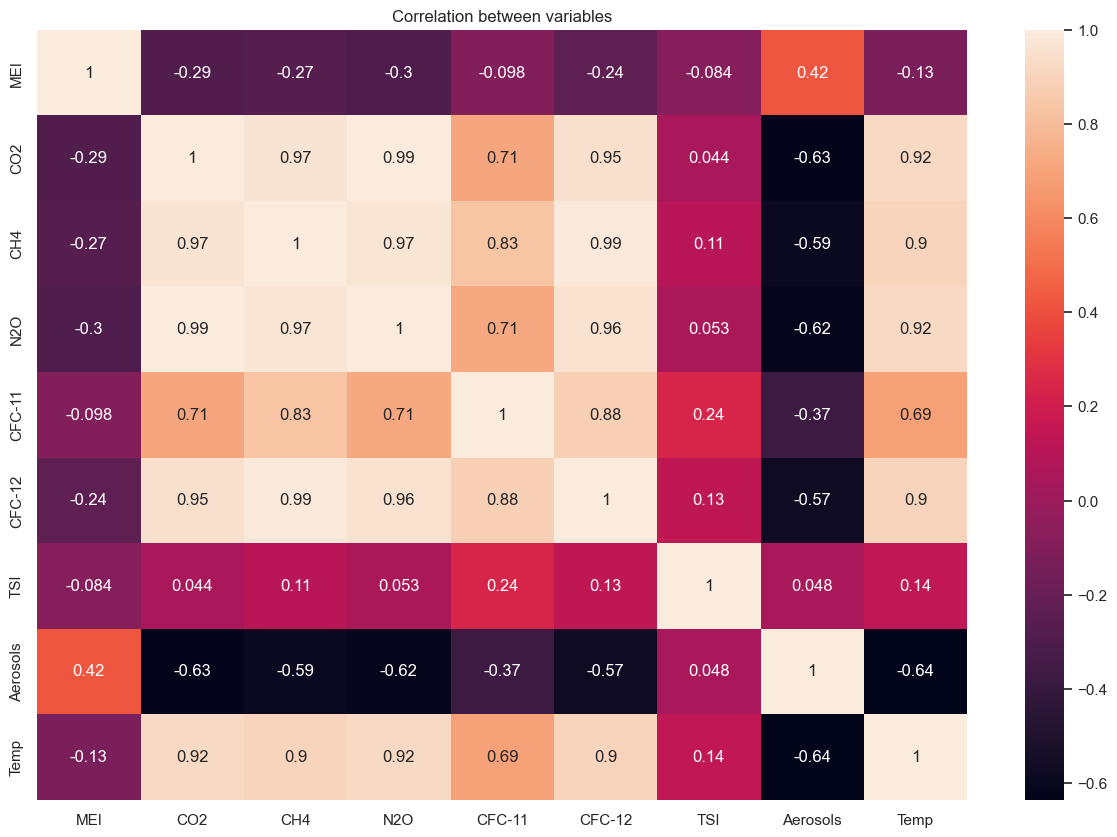

In [130]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
g=sns.heatmap(corr,ax=ax,annot=True)
ax.set_title('Correlation between variables')

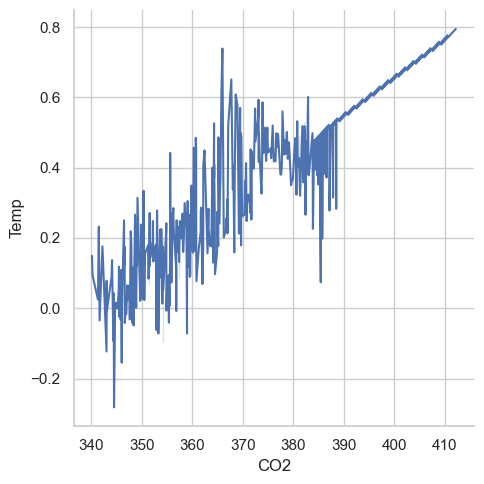

In [131]:
sns.relplot(x='CO2',y='Temp',kind='line',data=data)

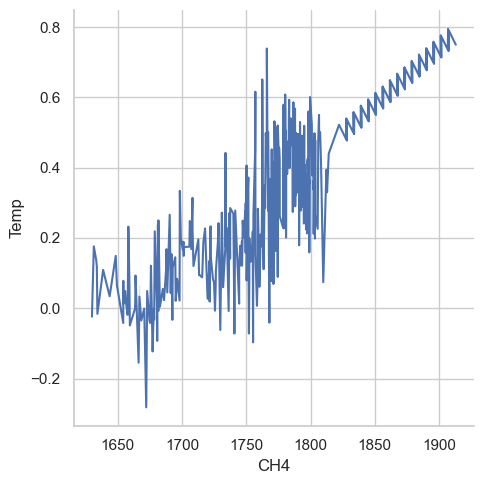

In [132]:
sns.relplot(x='CH4',y='Temp',kind='line',data=data)

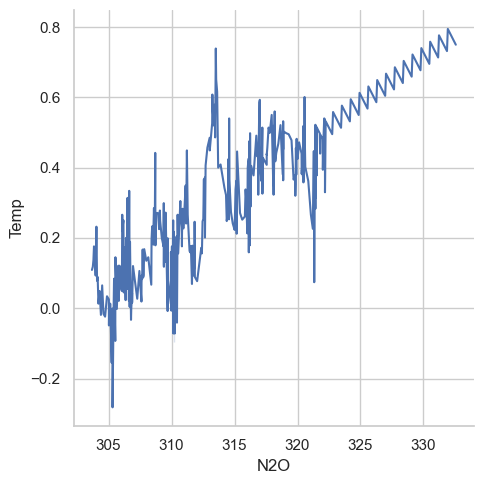

In [133]:
sns.relplot(x='N2O',y='Temp',kind='line',data=data)

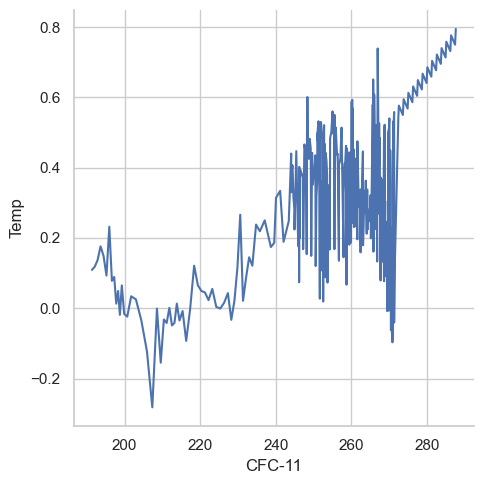

In [134]:
sns.relplot(x='CFC-11',y='Temp',kind='line',data=data)

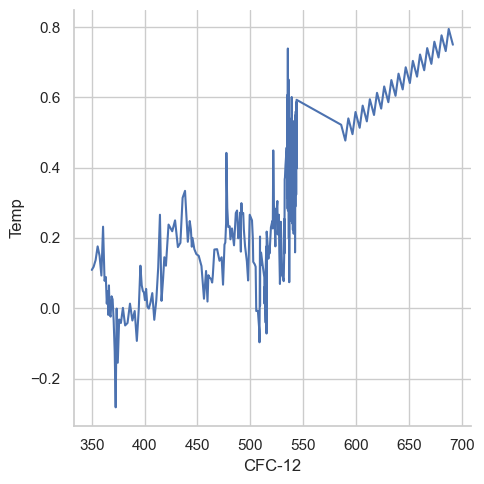

In [135]:
sns.relplot(x='CFC-12',y='Temp',kind='line',data=data)

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.03868321208673508
Mean Squared Error (MSE): 0.004293697584846535
Root Mean Squared Error (RMSE): 0.06552631215661793
R² Score: 0.929674379849957


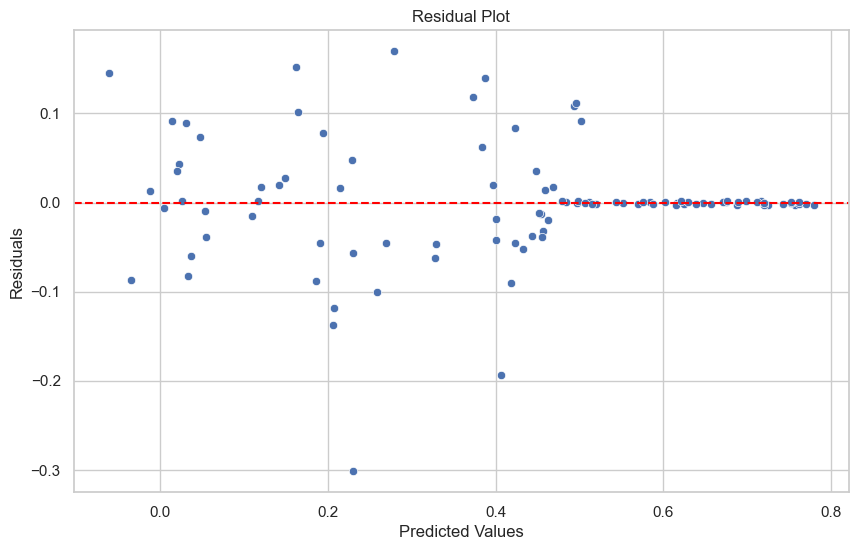

In [138]:
#  Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



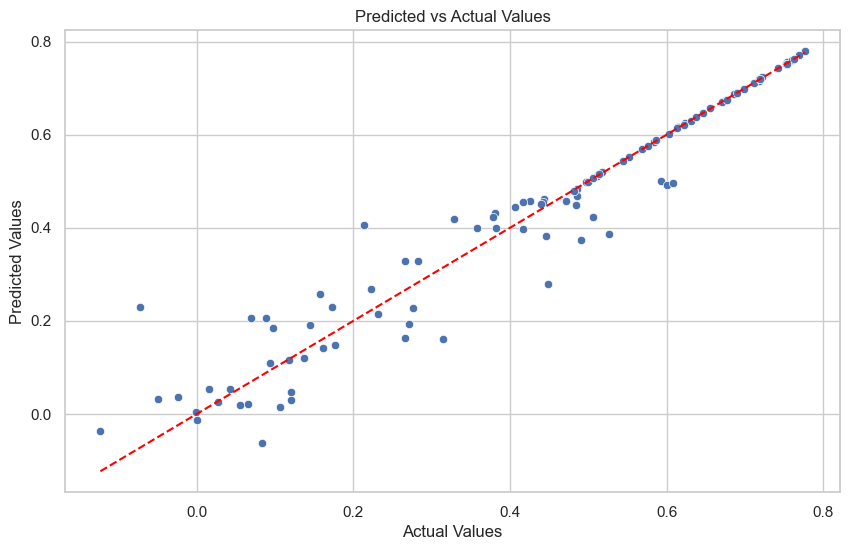

In [139]:

#  Predicted vs Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

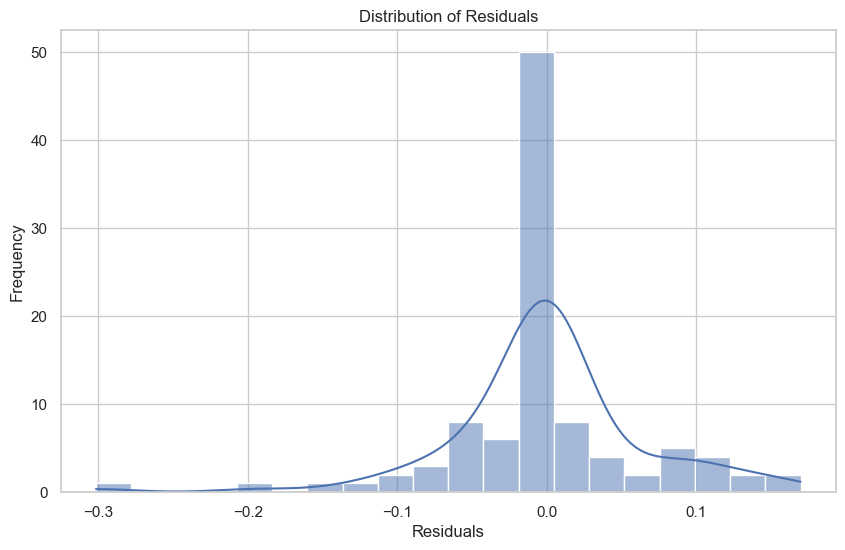

In [140]:
#  Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

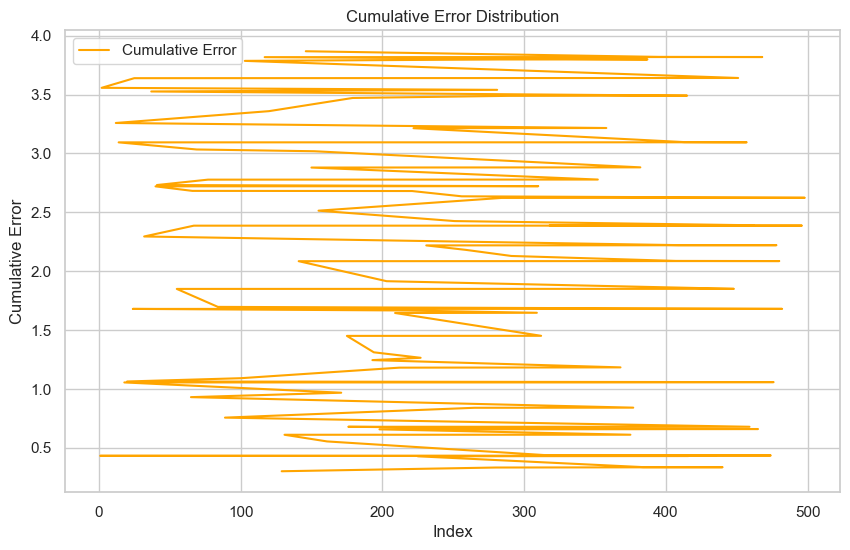

In [141]:
#  Cumulative error distribution
cumulative_error = np.cumsum(np.abs(residuals))
plt.figure(figsize=(10, 6))
plt.plot(cumulative_error, label='Cumulative Error', color='orange')
plt.title('Cumulative Error Distribution')
plt.xlabel('Index')
plt.ylabel('Cumulative Error')
plt.legend()
plt.show()

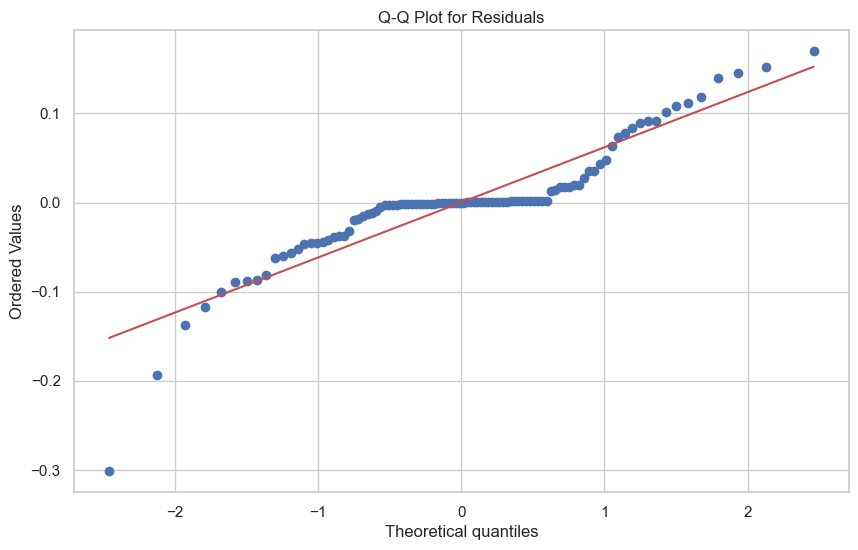

In [142]:
#  Q-Q plot for residuals
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


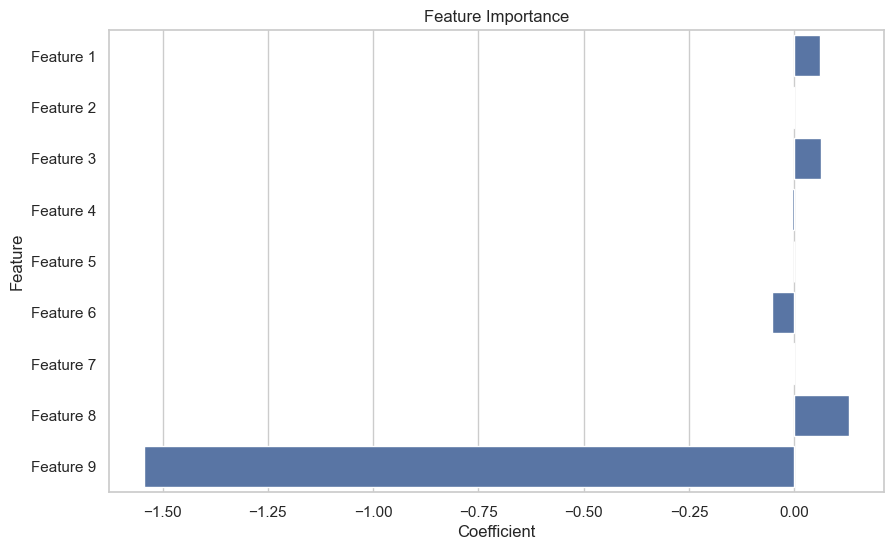

In [143]:
#  Feature importance plot (if multiple features)
if X.shape[1] > 1:  # Only if you have multiple features
    feature_importance = pd.DataFrame({
        'Feature': [f'Feature {i+1}' for i in range(X.shape[1])],
        'Coefficient': model.coef_
    })
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

Mean Absolute Error (MAE): 0.045425996935362145
Mean Squared Error (MSE): 0.004796375294441305
Root Mean Squared Error (RMSE): 0.0692558683032803
R² Score: 0.9214411214603542


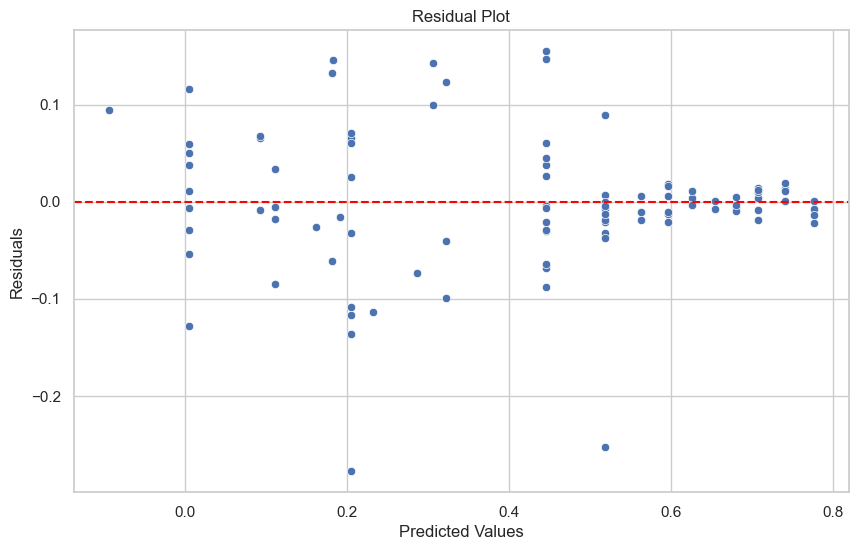

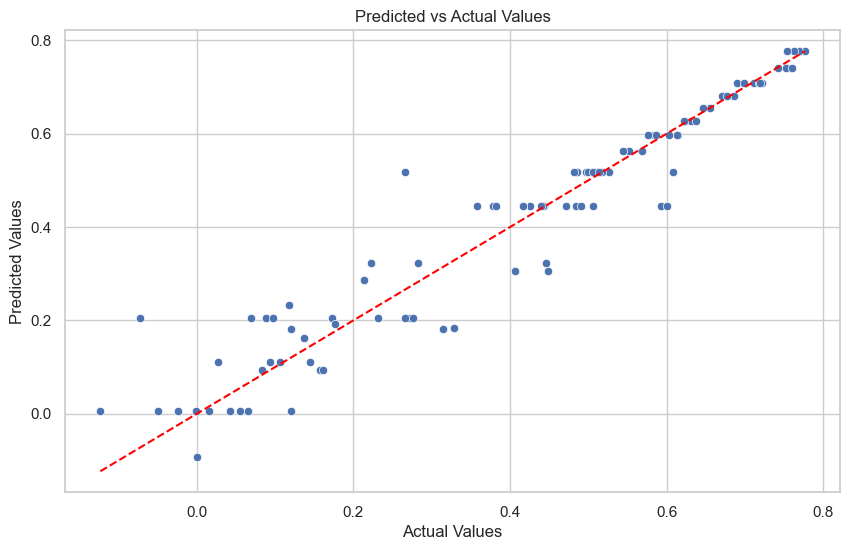

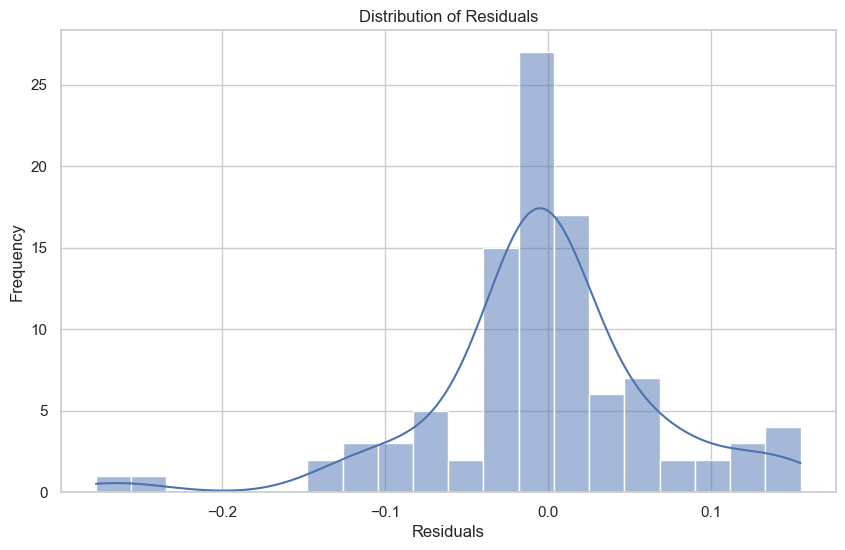

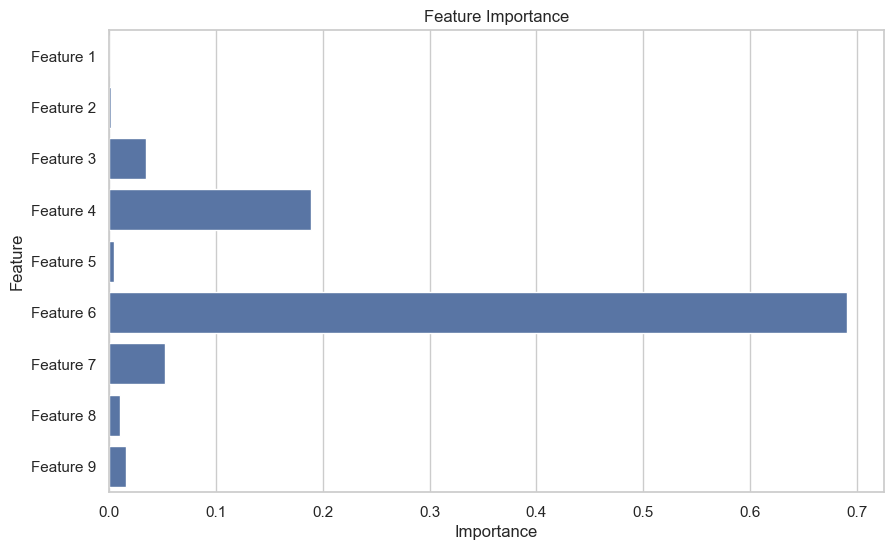

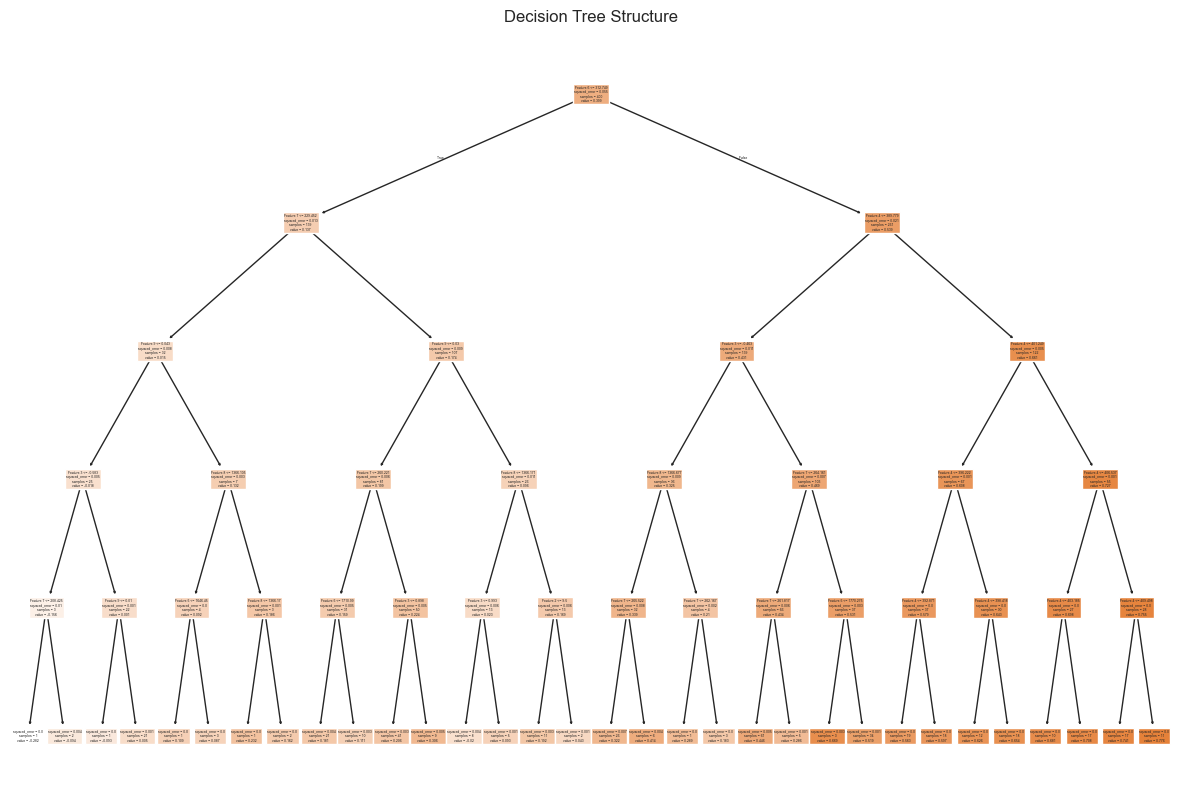

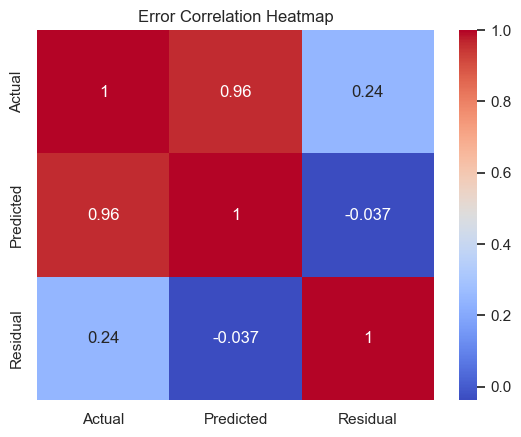

In [144]:
from sklearn.tree import DecisionTreeRegressor



# Train the Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

#Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#  Predicted vs Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


#  Feature importance plot (if multiple features)
if X.shape[1] > 1:  # Only if you have multiple features
    feature_importance = pd.DataFrame({
        'Feature': [f'Feature {i+1}' for i in range(X.shape[1])],
        'Importance': model.feature_importances_
    })
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

#  Decision tree structure (Optional)
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=[f'Feature {i+1}' for i in range(X.shape[1])])
plt.title('Decision Tree Structure')
plt.show()

#  Heatmap for error (if dataset is large)
error_matrix = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})
sns.heatmap(error_matrix.corr(), annot=True, cmap='coolwarm')
plt.title('Error Correlation Heatmap')
plt.show()


### RandomForestRegressor

Mean Absolute Error (MAE): 0.038600788552465126
Mean Squared Error (MSE): 0.0038479267994825476
Root Mean Squared Error (RMSE): 0.062031659654426044
R² Score: 0.9369755710274942


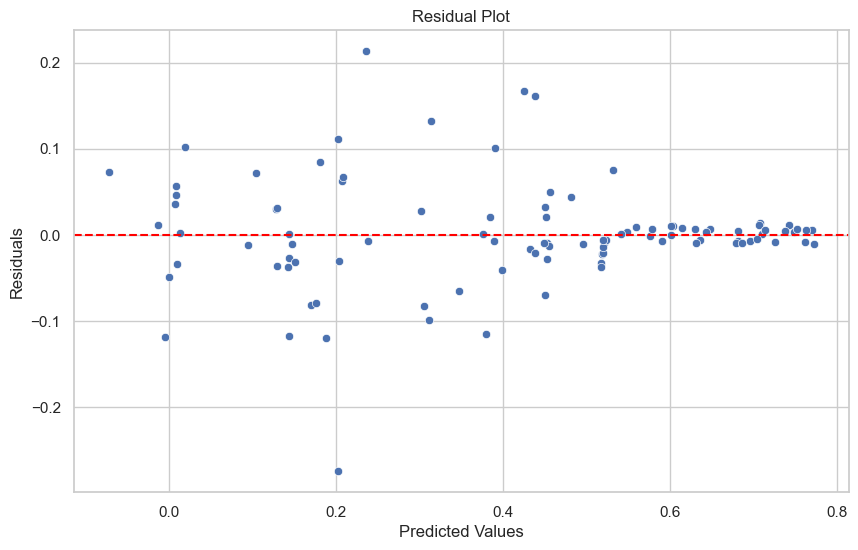

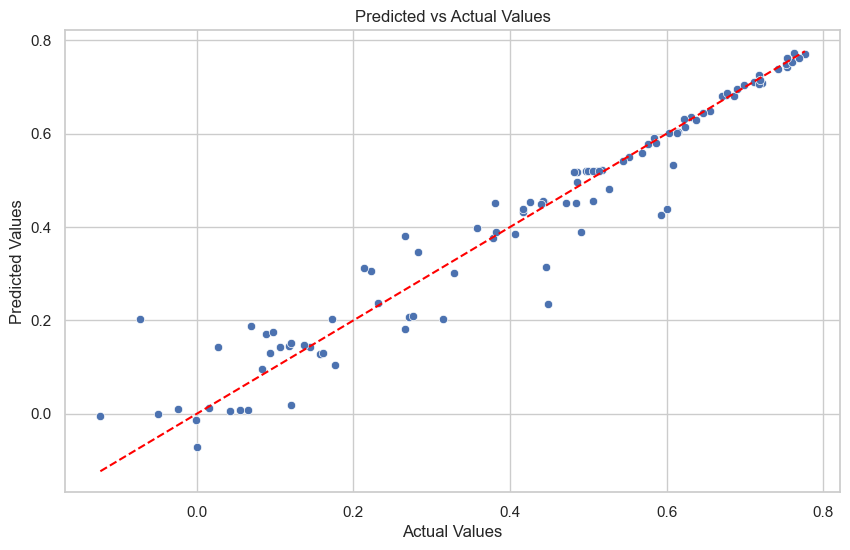

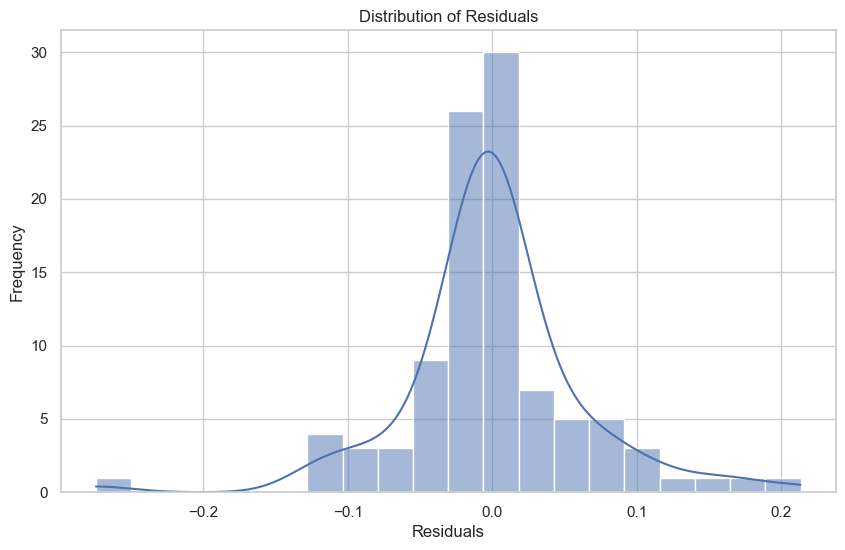

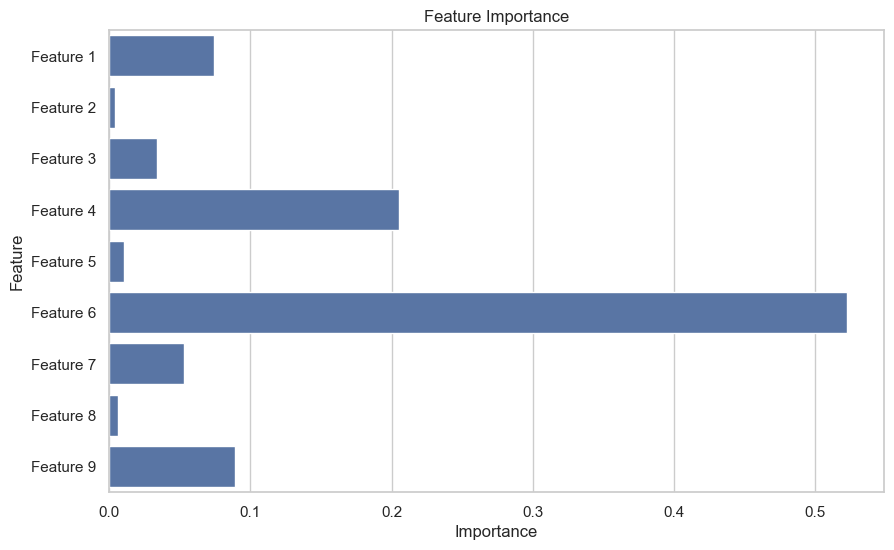

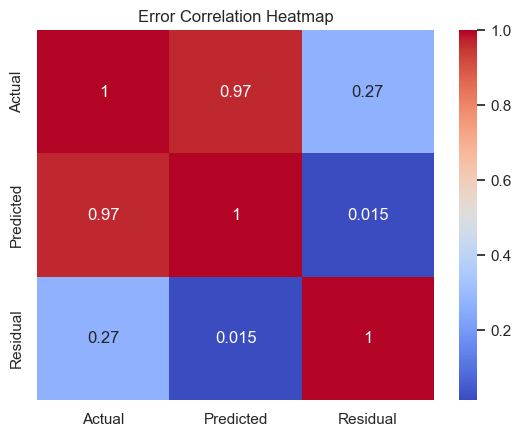

In [145]:
from sklearn.ensemble import RandomForestRegressor


# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

#  Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#  Predicted vs Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Feature importance plot (if multiple features)
if X.shape[1] > 1:  # Only if you have multiple features
    feature_importance = pd.DataFrame({
        'Feature': [f'Feature {i+1}' for i in range(X.shape[1])],
        'Importance': model.feature_importances_
    })
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

# 6. Heatmap for error (if dataset is large)
error_matrix = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})
sns.heatmap(error_matrix.corr(), annot=True, cmap='coolwarm')
plt.title('Error Correlation Heatmap')
plt.show()


Mean Absolute Error (MAE): 0.03562367876564403
Mean Squared Error (MSE): 0.0032108352211176368
Root Mean Squared Error (RMSE): 0.05666423229090496
R² Score: 0.9474103674833521


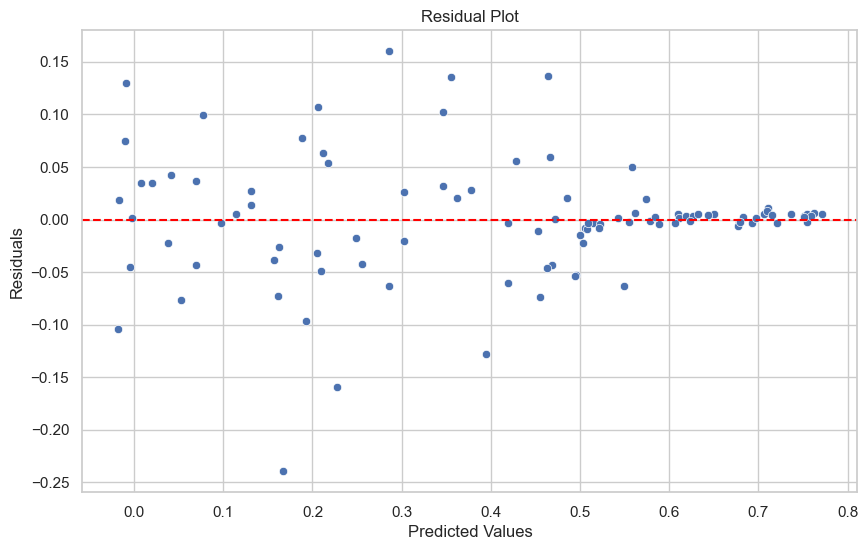

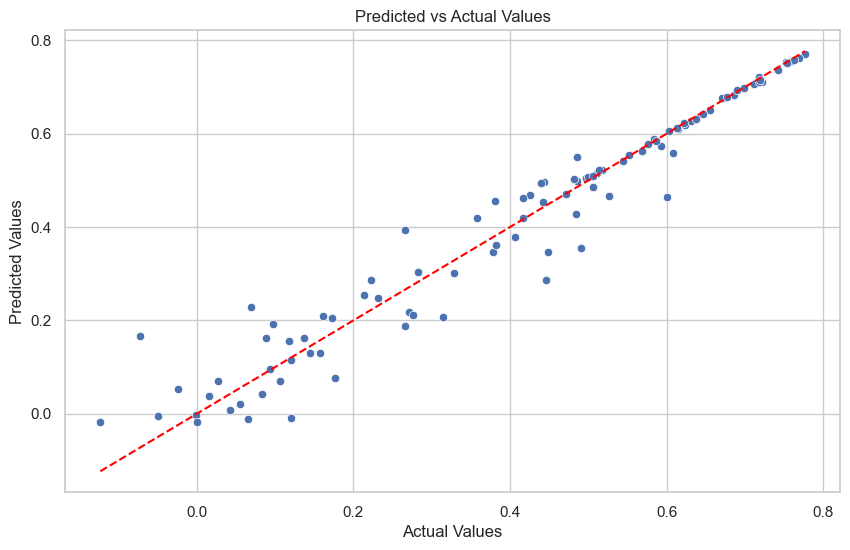

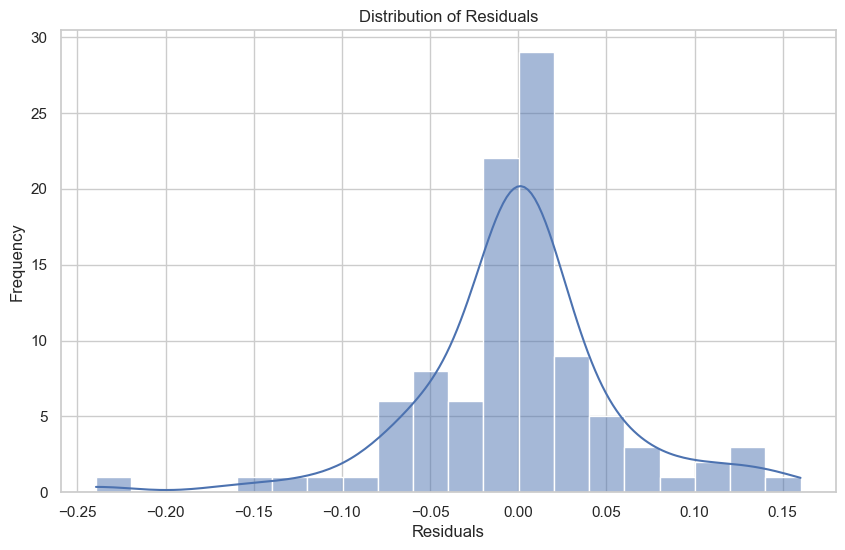

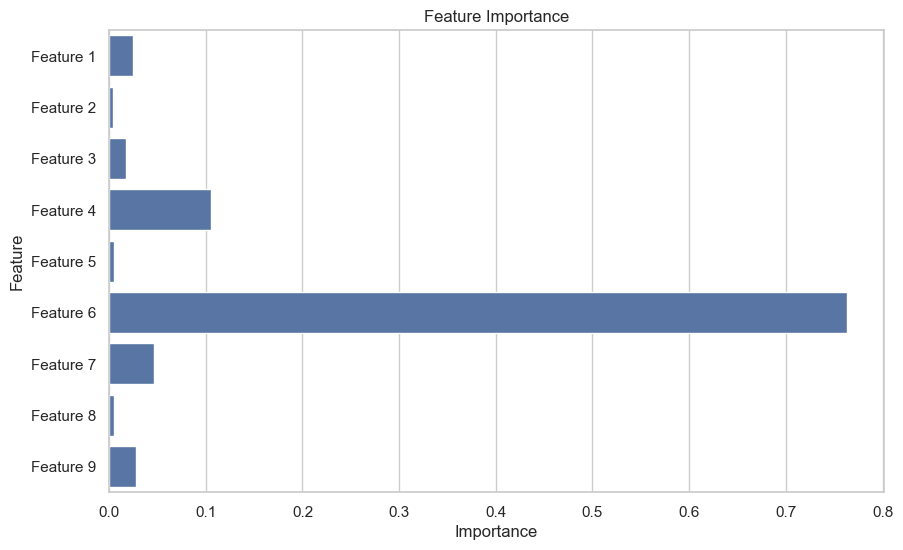

In [146]:
from xgboost import XGBRegressor

# Train the XGBoost Regressor model
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

#  Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#  Predicted vs Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Feature importance plot (if multiple features)
if X.shape[1] > 1:  # Only if you have multiple features
    feature_importance = pd.DataFrame({
        'Feature': [f'Feature {i+1}' for i in range(X.shape[1])],
        'Importance': model.feature_importances_
    })
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()


                     Model       MAE       MSE      RMSE  R² Score
0        Linear Regression  0.038683  0.004294  0.065526  0.929674
1  Decision Tree Regressor  0.045426  0.004796  0.069256  0.921441
2  Random Forest Regressor  0.038601  0.003848  0.062032  0.936976
3        XGBoost Regressor  0.035624  0.003211  0.056664  0.947410


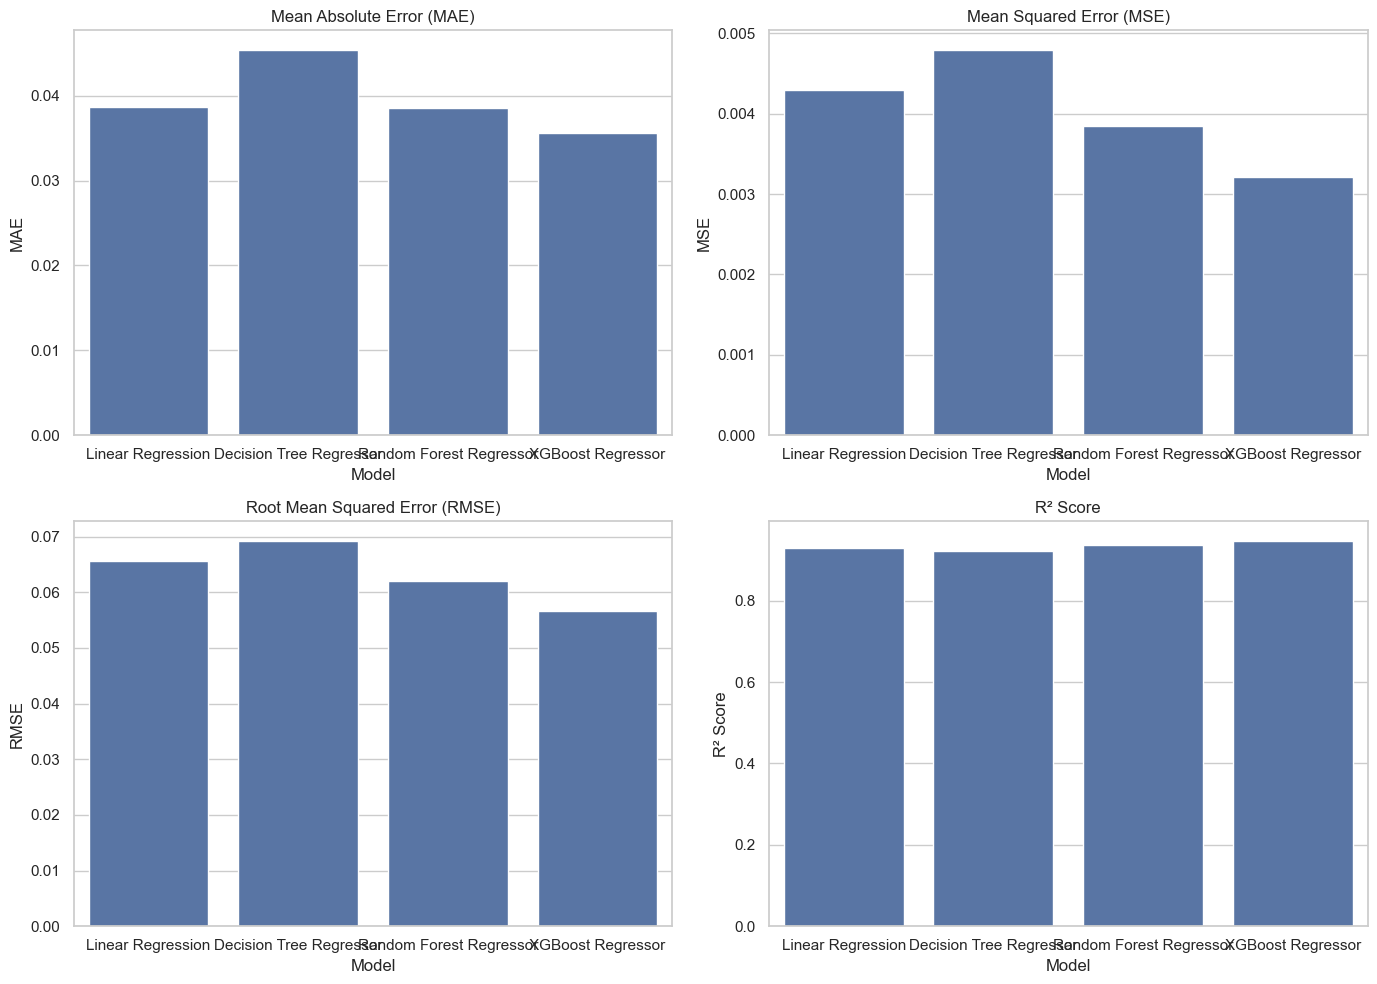

In [36]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=5),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

# Metrics dictionary to store the results
metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R² Score': []
}

# Train, evaluate, and save each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Save the trained model
    joblib.dump(model, f"{model_name.replace(' ', '_')}.joblib")

    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append metrics to dictionary
    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['R² Score'].append(r2)

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the comparison table
print(metrics_df)

# Save metrics as CSV for future reference
metrics_df.to_csv("model_metrics.csv", index=False)

# Visualize the comparison of models
metrics_df.set_index('Model', inplace=True)

# Plotting the comparison of metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MAE plot
sns.barplot(x=metrics_df.index, y=metrics_df['MAE'], ax=axes[0, 0])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
sns.barplot(x=metrics_df.index, y=metrics_df['MSE'], ax=axes[0, 1])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
sns.barplot(x=metrics_df.index, y=metrics_df['RMSE'], ax=axes[1, 0])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² Score plot
sns.barplot(x=metrics_df.index, y=metrics_df['R² Score'], ax=axes[1, 1])
axes[1, 1].set_title('R² Score')
axes[1, 1].set_ylabel('R² Score')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [37]:
# Load a saved model
loaded_model = joblib.load("Random_Forest_Regressor.pkl")
new_data =[[2019,1,-0.124180,403.778355,1878.764220,328.430129,281.387041,1366.118522,-0.016638]]
# Use the model for predictions
predictions = loaded_model.predict(new_data)
print(predictions)


[0.69855419]


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
